# Homework 1

## Exersice 3

### Answers:
To solve this problem, we use Bayes' theorem. 

\begin{align*}
A & : \text{The event that a person has contracted the virus.} \\
B & : \text{The event that the test result is positive.}
\end{align*}

We want to find the probability that a person has the virus given that the test result is positive, which is denoted as $P(A|B)$. We can use Bayes' theorem for this:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

$$
P(A): \text{The probability that a person has contracted the virus, which is 2\% or 0.02.} 
$$

$$
P(B|A) : \text{The probability that the test returns a positive result if a person has the virus, which is 0.999.} 
$$

$$
P(B|\neg A): \text{The probability that the test returns a positive result if a person does not have the virus (the false positive rate), which is 0.005.}
$$


To calculate $P(B)$, we can use the law of total probability:
$$
P(B) = P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)
$$
We are given that $P(\neg A)$, the probability that a person does not have the virus, is $1 - P(A)$, which is 0.98.

Now we can plug these values into Bayes' theorem:

$$
P(A|B) = \frac{0.999 \cdot 0.02}{0.999 \cdot 0.02 + 0.005 \cdot 0.98}
$$



$$
P(A|B) \approx \frac{0.01998}{0.01998 + 0.0049} \approx \frac{0.01998}{0.02488} \approx 0.803
$$

So, the probability that a person has the virus given that the test result is positive is approximately 0.803, or 80.3\%.


### Solution:



In [15]:
# Placeholder for python part of exersice YY
import numpy as np


N = 10**4


p_infected = 0.02  # Probability that an individual is infected
p_positive_given_infected = 0.999  # Probability of a positive test given infected
p_positive_given_not_infected = 0.005  # Probability of a positive test given not infected


infection_status = np.random.choice([0, 1], size=N, p=[1 - p_infected, p_infected])


test_results = []
for status in infection_status:
    if status == 1:  # If infected
        result = np.random.choice([0, 1], p=[1 - p_positive_given_infected, p_positive_given_infected])
    else:  # If not infected
        result = np.random.choice([0, 1], p=[1 - p_positive_given_not_infected, p_positive_given_not_infected])
    test_results.append(result)


percentage_positive = sum(test_results) / N * 100

print(f"Percentage of individuals with a positive test result: {percentage_positive:.2f}%")

Percentage of individuals with a positive test result: 2.54%


## Exersice  8 -part one





$X$ is a Bernoulli r.v that can be $1$ or $0$ with the probability of $p$ and $1-p$ respectively.

$Y$ would represent r.v. for pooling results: $Y=X_1+X_2...+X_k$.

The pobability of getting positive results for a pooled sample of people:
$$
\Pr[Y>0] = 1-\Pr[Y=0]=1-(1-p)^{k}
$$
Expectation number of samples in one group:
$$
\text{E}[Y] = (1-(1-p)^{k})*(k+1)+ ((1-p)^{k})
$$
Overall Expectation $Z=Y_1+Y_2...+Y_m$.:
$$
\text{E}[Z] = \text{E}[Y]*\frac{n}{k}= (\frac{n}{k})[(1-(1-p)^{k})*(k+1)+ ((1-p)^{k})]
$$



In [17]:

import random

# Parameters
n = 10**2
k = 10
iterations = 10**4
p_values = [0.02, 0.2, 0.6]

# Initialize counters
avg_pooled_positive = {p: 0 for p in p_values}
avg_expected_tests = {p: 0 for p in p_values}

# Simulate the process
for _ in range(iterations):
    for p in p_values:
        # Simulate test results for n individuals with probability p
        test_results = [random.random() < p for _ in range(n)]
        
        # Split test results into groups of k
        groups = [test_results[i:i+k] for i in range(0, n, k)]
        
        for group in groups:
            # Calculate the pooled positive probability
            pooled_positive_prob = 1 - (1 - p) ** k
            
            # Calculate the expected number of tests
            expected_tests = k + 1 if any(group) else 1
            
            # Update counters
            avg_pooled_positive[p] += pooled_positive_prob
            avg_expected_tests[p] += expected_tests

# Calculate averages
avg_pooled_positive = {p: prob / iterations for p, prob in avg_pooled_positive.items()}
avg_expected_tests = {p: tests / iterations for p, tests in avg_expected_tests.items()}

print("Average Probability of Pooled Positive Test:")
for p, prob in avg_pooled_positive.items():
    print(f"p = {p}: {prob:.4f}")

print("\nAverage Expected Number of Tests:")
for p, tests in avg_expected_tests.items():
    print(f"p = {p}: {tests:.4f}")


Average Probability of Pooled Positive Test:
p = 0.02: 1.8293
p = 0.2: 8.9263
p = 0.6: 9.9990

Average Expected Number of Tests:
p = 0.02: 28.1050
p = 0.2: 99.1500
p = 0.6: 109.9940


## Exersice  8 -part two
For optimum number of k : 
$$
\frac{\partial \text{E}[Y]}{\partial k}=0
$$
$\text{E}[Y]$ can be written as:
$$
\text{E}[Y] = (1-(1-p)^{k})*(k+1)+ ((1-p)^{k})=\frac{1}{k}+1-(1-p)^k
$$
$$
\frac{\partial \text{E}[Y]}{\partial k}=-\frac{1}{k^2}-\text{ln(1-p)}*(1-p)^k=0
$$
$$
\text{ln}(\frac{1}{1-p}) * (1-p)^{k}=\frac{1}{k^2}
$$
Assuming that p is close to 0:
$$
\text{ln}(\frac{1}{1-p})=p
$$
$$
(1-p)^{k}=1
$$
Therefore :
$$
\frac{1}{k^2}=p
$$
$$
\text{k optimum}= \frac{1}{\sqrt{p}}
$$



In [31]:
import numpy as np

# Function to calculate the optimal k using the formula k_optimum = 1 / sqrt(p)
def calculate_optimal_k(p):
    return int(1 / np.sqrt(p))

# Values of p to test
p_values = [0.02, 0.2, 0.6]

# Calculate the optimal k values for each p
optimal_k_values = [calculate_optimal_k(p) for p in p_values]

# Print the results
for i in range(len(p_values)):
    p = p_values[i]
    k_opt = optimal_k_values[i]
    print(f"Optimal k for p = {p}: {k_opt}")

# Compare with the previous approximation (best_k)
best_k = 8  # Best integer value of k from a previous approximation

for i in range(len(p_values)):
    p = p_values[i]
    k_opt = optimal_k_values[i]
    print(f"Approximation k for p = {p}: {best_k}")
    print(f"Optimal k matches approximation for p = {p}: {k_opt == best_k}")


Optimal k for p = 0.02: 7
Optimal k for p = 0.2: 2
Optimal k for p = 0.6: 1
Approximation k for p = 0.02: 8
Optimal k matches approximation for p = 0.02: False
Approximation k for p = 0.2: 8
Optimal k matches approximation for p = 0.2: False
Approximation k for p = 0.6: 8
Optimal k matches approximation for p = 0.6: False


## Exersice  8 -part three

For pooling to be a better alternative:
$$
\text{E}[Z]<n
$$
$$
(\frac{n}{k})[(1-(1-p)^{k})*(k+1)+ ((1-p)^{k})]<n
$$
$$
k+1-k*(1-p)^{k} <k
$$

$$
1<k(1-p)^{k}
$$


$$
p<1-\frac{1}{K}^\frac{1}{K}
$$

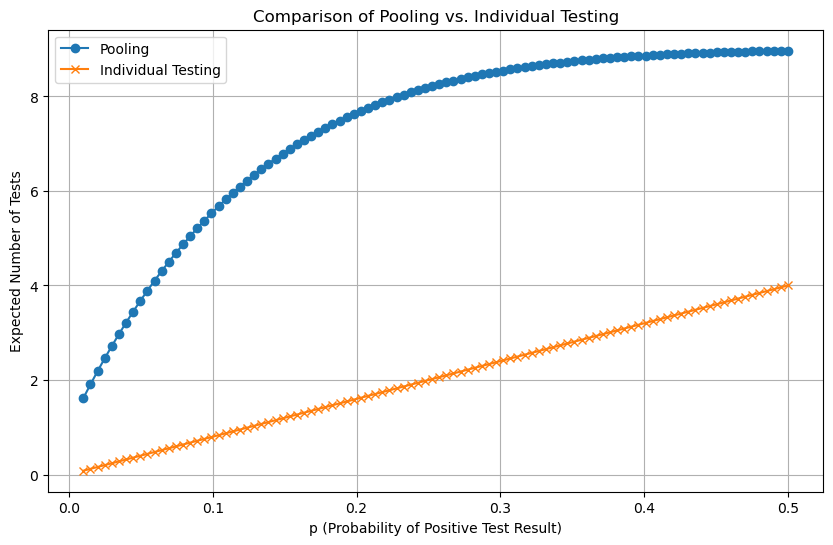

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the expected number of tests for pooling
def expected_tests_pooling(k, p):
    return (n/k) * ((1 - (1 - p)**k) * (k + 1) + (1 - p)**k)

# Function to calculate the expected number of tests for individual testing
def expected_tests_individual(n, p):
    return n * p

# Parameters
n = 10^2
p_values = np.linspace(0.01, 0.5, 100)  # Range of p values
best_k = 8  # Best integer value of k based on the previous analysis

# Calculate expected number of tests for both strategies
expected_tests_pooling_values = [expected_tests_pooling(best_k, p) for p in p_values]
expected_tests_individual_values = [expected_tests_individual(n, p) for p in p_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, expected_tests_pooling_values, label='Pooling', linestyle='-', marker='o')
plt.plot(p_values, expected_tests_individual_values, label='Individual Testing', linestyle='-', marker='x')
plt.xlabel('p (Probability of Positive Test Result)')
plt.ylabel('Expected Number of Tests')
plt.title('Comparison of Pooling vs. Individual Testing')
plt.legend()
plt.grid(True)
plt.show()
